In [116]:
import matplotlib.pyplot as plt

from hiive.mdptoolbox import mdp, example

## Forest Fire

1. Compare state size
2. Compare discount
3. value iter vs policy iter: num of iter, converge time, answer same? state size?

In [148]:
def plot_rewards(results):
    for result in results:
        run_stats_df = pd.DataFrame(result['run_stats'])
        plt.plot(run_stats_df['Iteration'], run_stats_df['Mean V'], label = "Mean Reward")
        plt.plot(run_stats_df['Iteration'], run_stats_df['Max V'], label = "Max Reward")
        plt.xlabel('Iteration')
        plt.ylabel('Reward')
        plt.title(result['exp_name'])
        plt.legend()
        plt.show()

def plot_time(results):
    for result in results:
        run_stats_df = pd.DataFrame(result['run_stats'])
        plt.plot(run_stats_df['Iteration'], run_stats_df['Time'], label = "time")
        plt.xlabel('Iteration')
        plt.ylabel('time')
        plt.title(result['exp_name'])
        plt.legend()
        plt.show()

def run_forest(solver, states, discounts, solver_name, probability=0.1, max_iter=5000):
    experiments = [] #num states, probability, discount, time, iterations, policy
    for d in discounts:
        for s in states:
            current_name = f"{solver_name}_iter_{s}_state_{d}_discount"
            record = {}
            P, R = example.forest(S=s, p=probability)
            args = {"transitions":P, "reward":R, "gamma":d, "max_iter":max_iter}
            mdp = solver(args)
            mdp.run()
            record['exp_name'] = current_name
            record['policy'] = mdp.policy
            record['num_states'] = s
            record['discount'] = d
            record['iterations'] = mdp.iter
            record['run_stats'] = mdp.run_stats
            experiments.append(record)
    plot_rewards(experiments)
    plot_time(experiments)
    return experiments

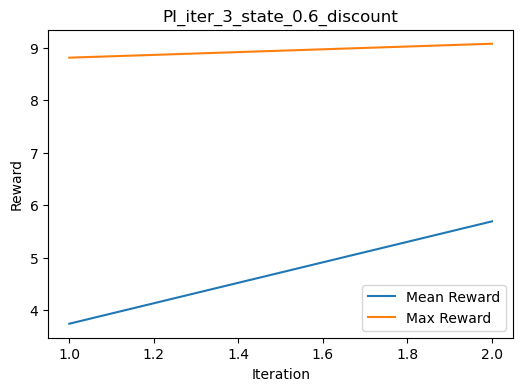

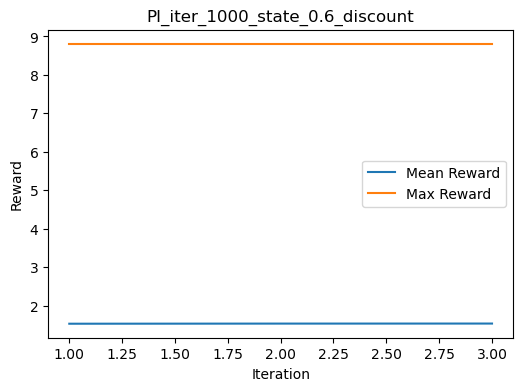

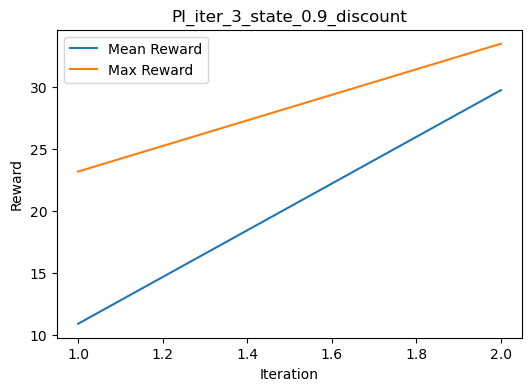

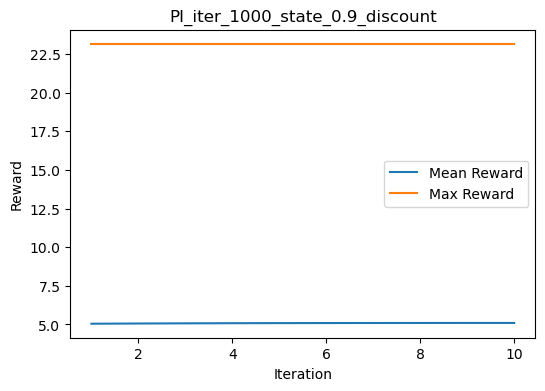

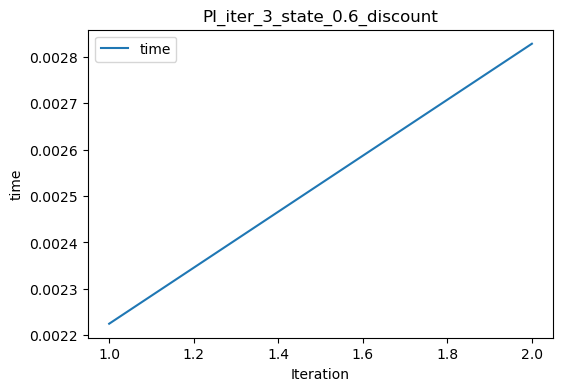

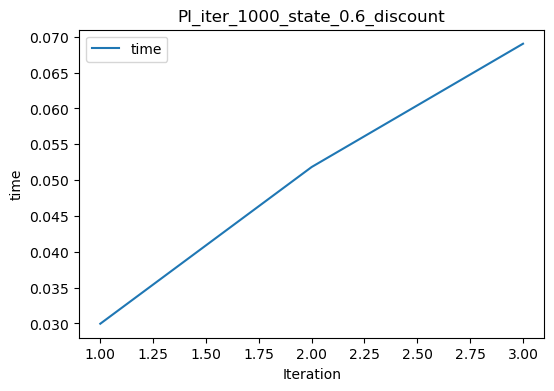

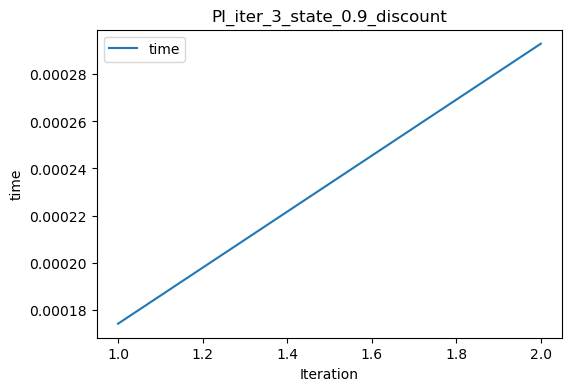

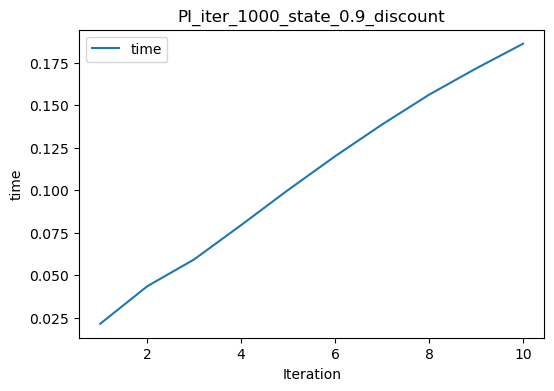

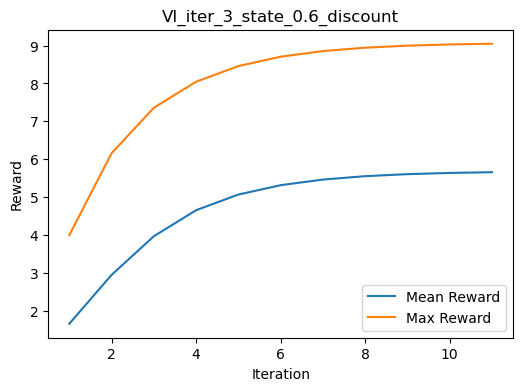

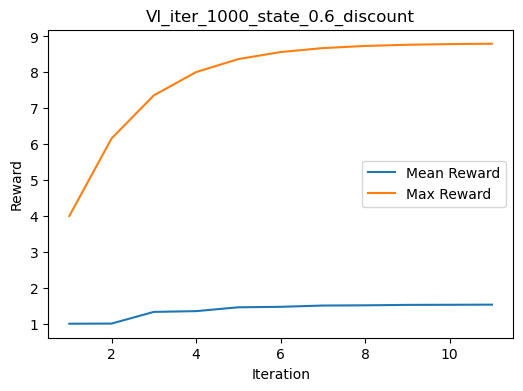

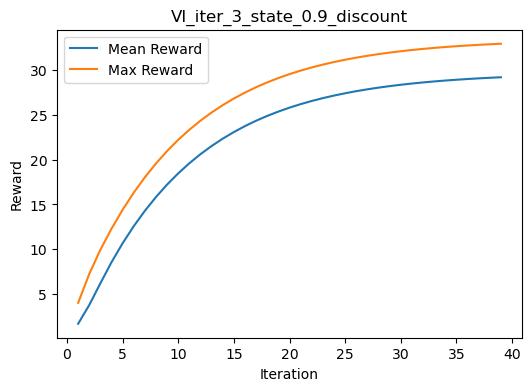

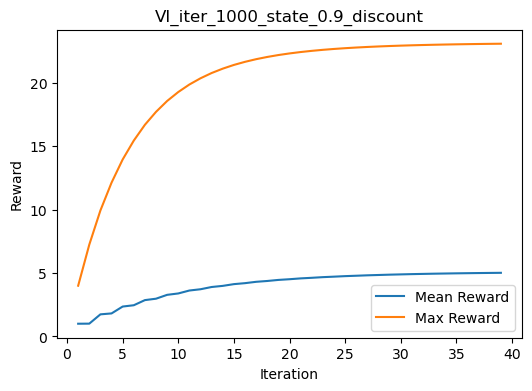

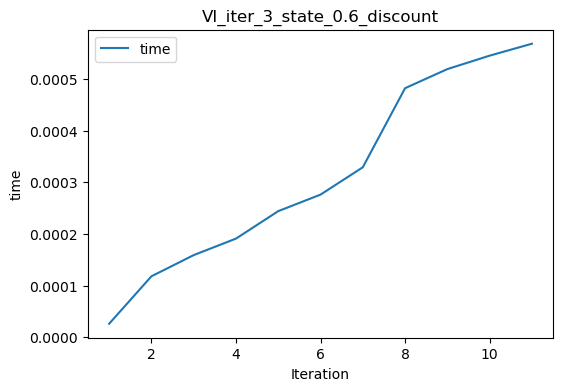

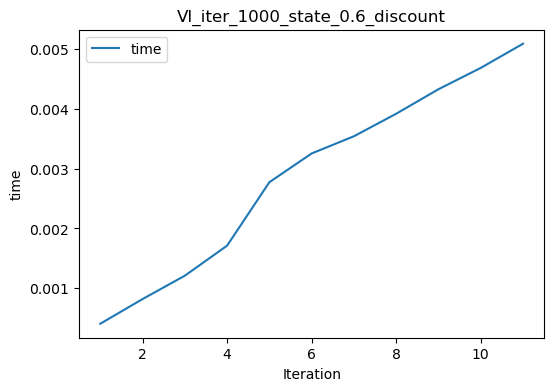

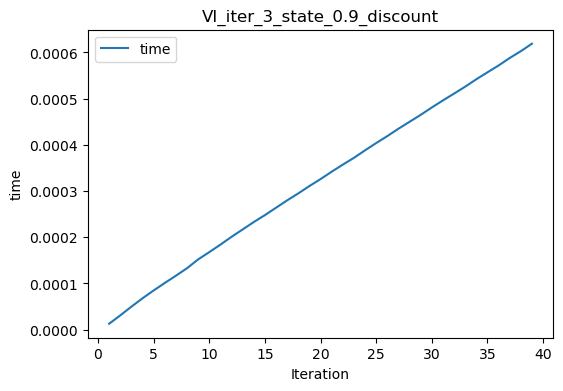

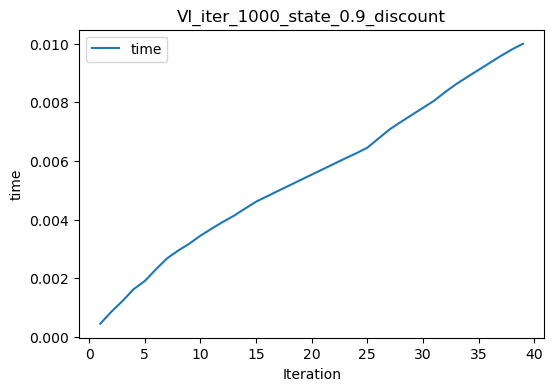

In [179]:
states = [3, 1000]
discounts = [0.6, 0.9]

# PI
fm_policy_iteration = lambda dict_args: mdp.PolicyIteration(**dict_args)
fm_policy_iteration_results = run_forest(fm_policy_iteration, states, discounts, "PI")

# VI
fm_value_iteration = lambda dict_args: mdp.ValueIteration(**dict_args)

fm_value_iteration_results = run_forest(fm_value_iteration, states, discounts, "VI")

## Frozen Lake

1. Compare state size
2. Compare reward setup
3. value iter vs policy iter: num of iter, converge time, answer same? state size?

In [136]:
def visualize_direction(policy, size):
    pol = list(policy)
    sublists = [pol[x:x+size] for x in range(0, len(pol), size)]
    for lst in sublists:
        for i in range(len(lst)):
            if lst[i] == 0:
                lst[i] = '←'
            elif lst[i] == 1:
                lst[i] = '↓'
            elif lst[i] == 2:
                lst[i] = '→'  
            elif lst[i] == 3:
                lst[i] = '↑'
        print(lst)
    return sublists

In [137]:
visualize_direction(vilarge.policy, 3)

['↓', '→', '→']
['↓', '↓', '↓']
['↓', '→', '←']


[['↓', '→', '→'], ['↓', '↓', '↓'], ['↓', '→', '←']]

In [183]:
from gym.envs.toy_text.frozen_lake import generate_random_map


def run_lake(solver, sizes, discounts, solver_name, max_iter=500):
    experiments = [] #num states, probability, discount, time, iterations, policy
    for d in discounts:
        for s in sizes:
            print(d, s)
            current_name = f"{solver_name}_iter_{s}_state_{d}_discount"
            record = {}
            random_map = generate_random_map(size=s)
            P, R = example.openai("FrozenLake-v1", desc=random_map, is_slippery=True)
            args = {"transitions":P, "reward":R, "gamma":d, "max_iter":max_iter}
            mdp = solver(args)
            mdp.run()
            record['exp_name'] = current_name
            record['policy'] = mdp.policy
            record['size_of_grid'] = s
            record['discount'] = d
            record['iterations'] = mdp.iter
            record['run_stats'] = mdp.run_stats
            experiments.append(record)
    plot_rewards(experiments)
    plot_time(experiments)
    return experiments

In [185]:
sizes = [3, 50]
discounts = [0.6, 0.9]

# PI
fl_policy_iteration = lambda dict_args: mdp.PolicyIteration(**dict_args)
fl_policy_iteration_results = run_lake(fl_policy_iteration, sizes, discounts, "PI")

# VI
fl_value_iteration = lambda dict_args: mdp.ValueIteration(**dict_args)
fl_value_iteration_results = run_lake(fl_value_iteration, sizes, discounts, "VI")

0.6 3
0.6 50
0.9 3
0.9 50
0.6 3
0.6 50
0.9 3
0.9 50


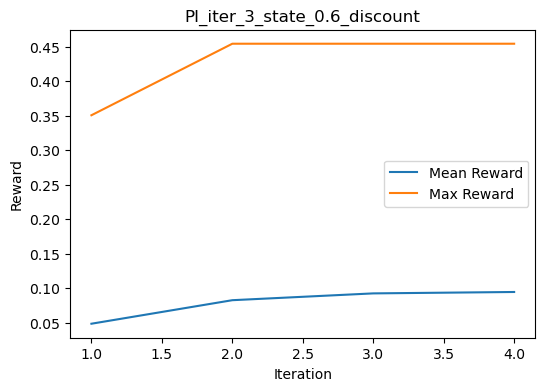

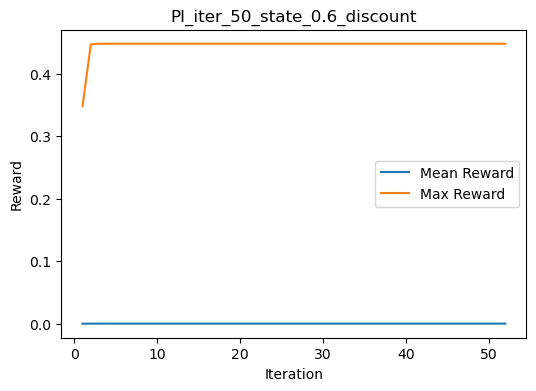

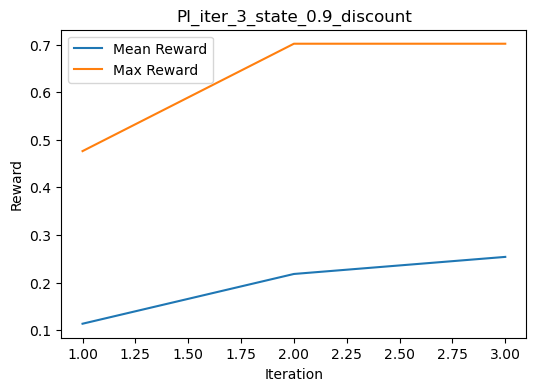

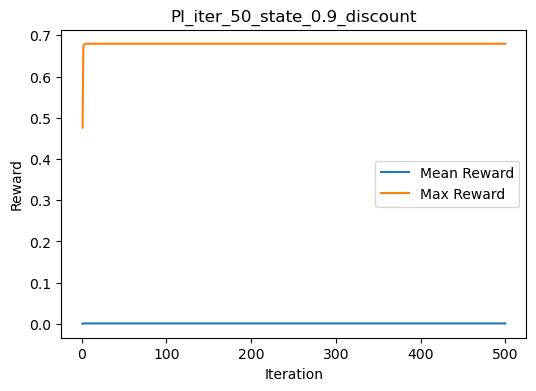

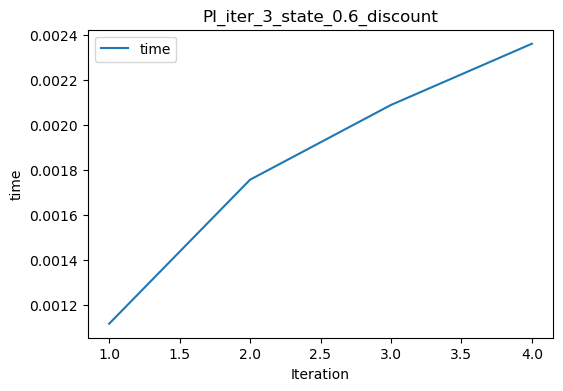

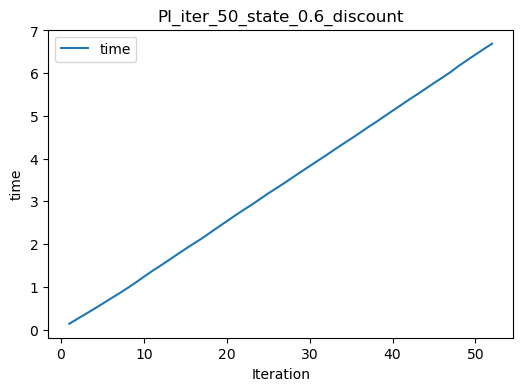

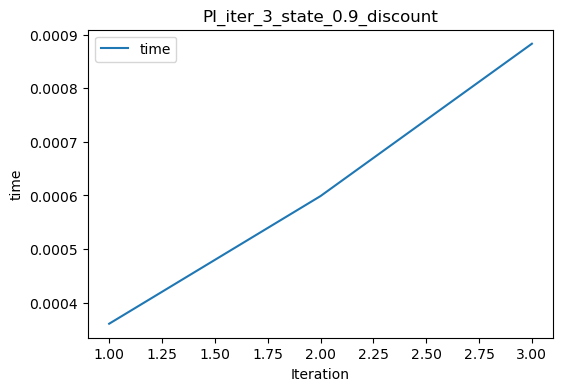

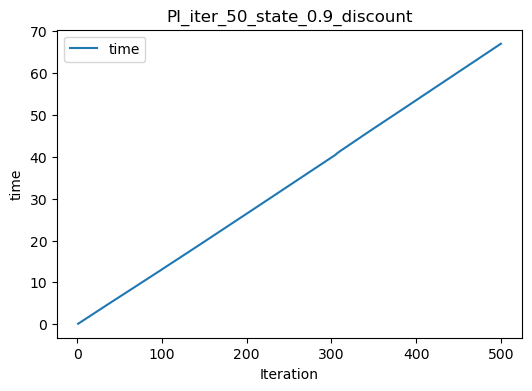

In [195]:
plot_rewards(fl_policy_iteration_results)
plot_time(fl_policy_iteration_results)

In [192]:
def compare_policy(results_1, results_2, term):
    diff = {}
    for i in range(len(results_1)):
        assert results_1[i][term] == results_2[i][term]
        assert results_1[i]['discount'] == results_2[i]['discount']
        
        diff[f"{results_1[i][term]}_{results_1[i]['discount']}"] = results_2[i]['policy'] == results_1[i]['policy']
    return diff

## Q Learner

In [199]:
def q_learning_lake(solver, sizes, discounts, solver_name, max_iter=500):
    experiments = [] #num states, probability, discount, time, iterations, policy
    for d in discounts:
        for s in sizes:
            print(d, s)
            current_name = f"{solver_name}_iter_{s}_state_{d}_discount"
            record = {}
            random_map = generate_random_map(size=s)
            P, R = example.openai("FrozenLake-v1", desc=random_map, is_slippery=True)
            args = {"transitions":P, "reward":R, "gamma":d}
            mdp = solver(args)
            mdp.run()
            record['exp_name'] = current_name
            record['policy'] = mdp.policy
            record['size_of_grid'] = s
            record['discount'] = d
            # record['iterations'] = mdp.iter
            record['run_stats'] = mdp.run_stats
            experiments.append(record)
    plot_rewards(experiments)
    plot_time(experiments)
    return experiments

0.6 3
0.6 50
0.9 3
0.9 50


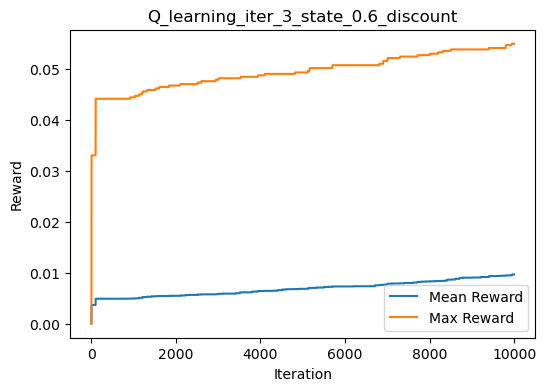

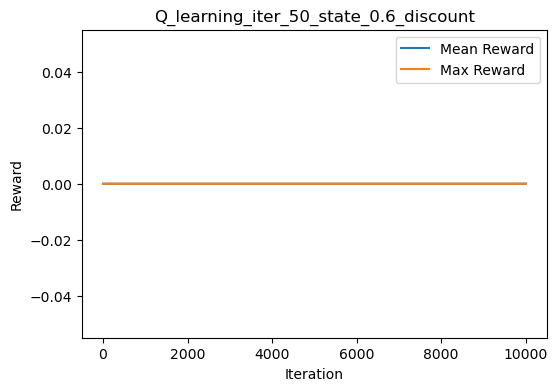

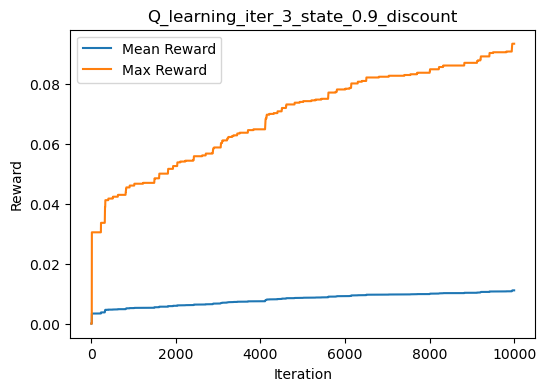

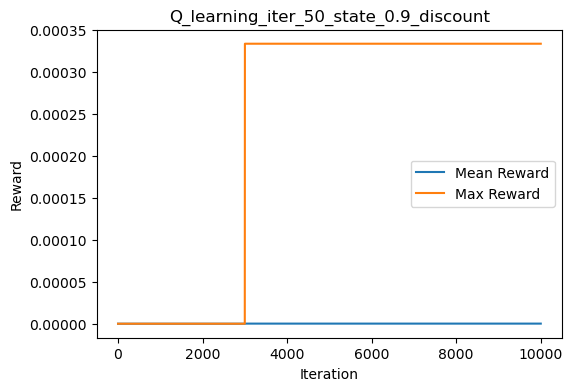

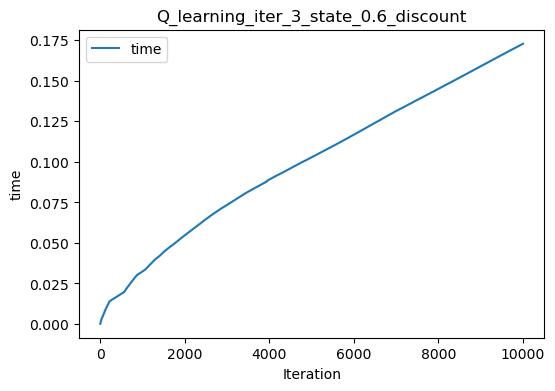

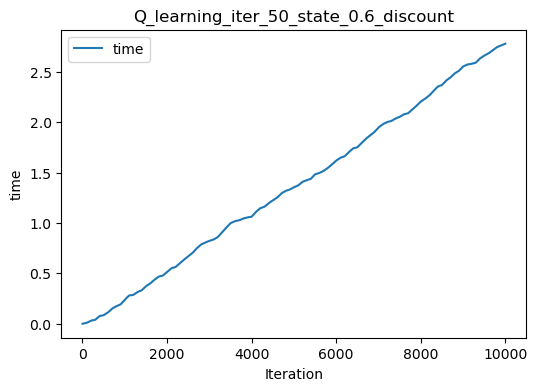

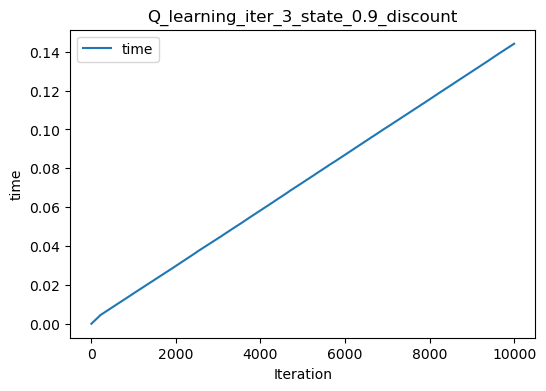

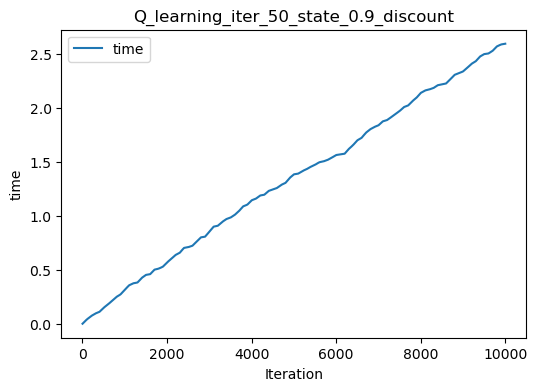

In [200]:
sizes = [3, 50]
discounts = [0.6, 0.9]

# Q-Learning
fl_q_learner = lambda dict_args: mdp.QLearning(**dict_args)
fl_q_learner_results = q_learning_lake(fl_q_learner, sizes, discounts, "Q_learning")

In [203]:
def q_learning_forest(solver, states, discounts, solver_name, probability=0.1, max_iter=5000):
    experiments = [] #num states, probability, discount, time, iterations, policy
    for d in discounts:
        for s in states:
            current_name = f"{solver_name}_iter_{s}_state_{d}_discount"
            record = {}
            P, R = example.forest(S=s, p=probability)
            args = {"transitions":P, "reward":R, "gamma":d}
            mdp = solver(args)
            mdp.run()
            record['exp_name'] = current_name
            record['policy'] = mdp.policy
            record['num_states'] = s
            record['discount'] = d
            # record['iterations'] = mdp.iter
            record['run_stats'] = mdp.run_stats
            experiments.append(record)
    plot_rewards(experiments)
    plot_time(experiments)
    return experiments

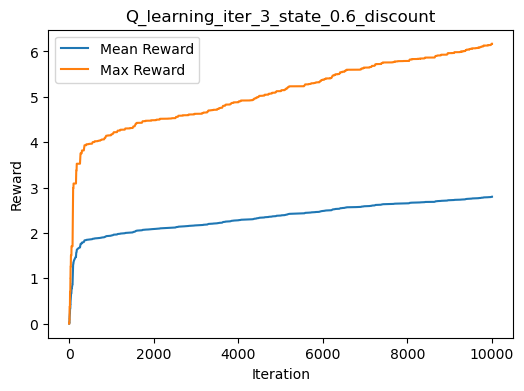

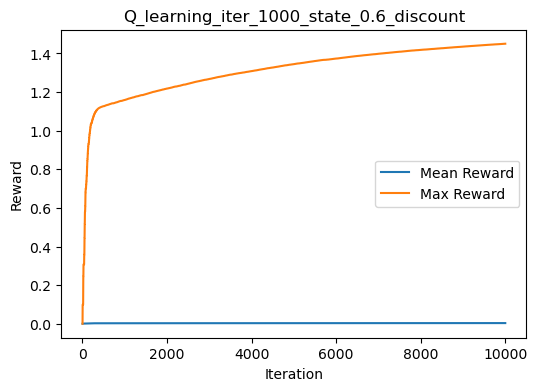

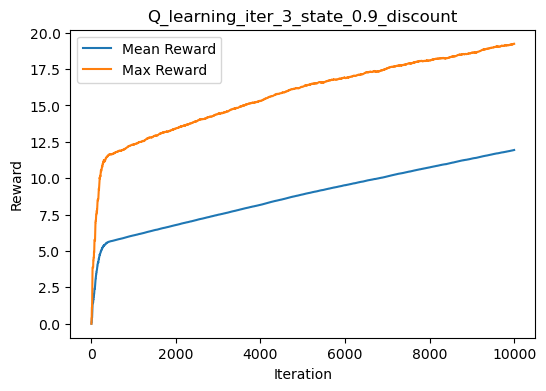

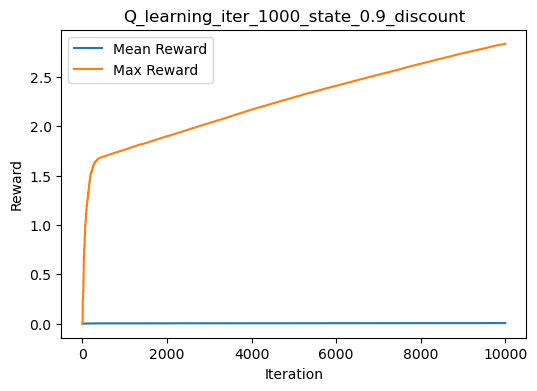

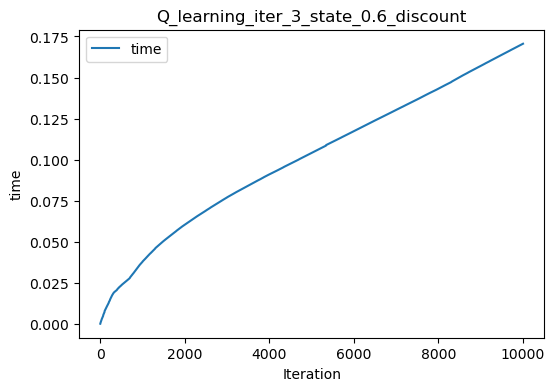

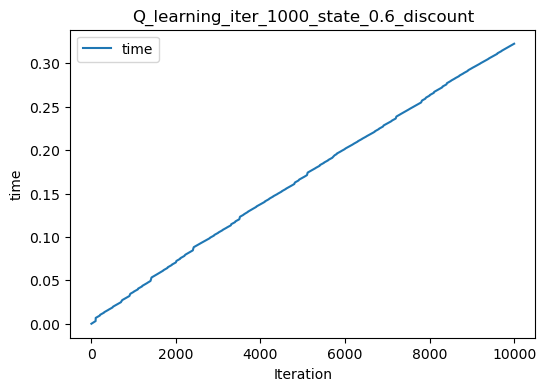

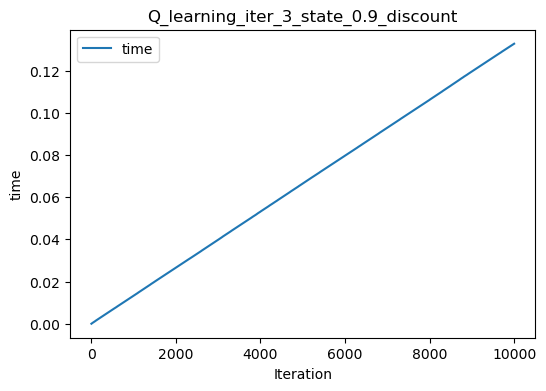

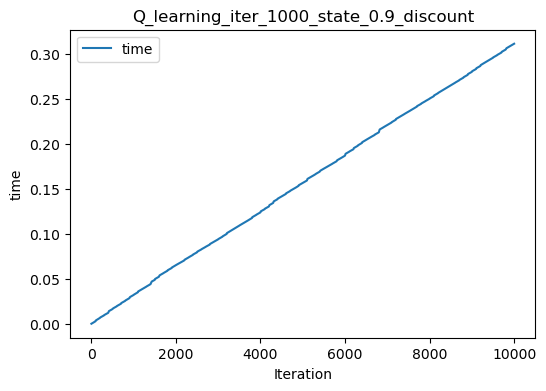

In [204]:
states = [3, 1000]
discounts = [0.6, 0.9]

# Q-Learning
ff_q_learner = lambda dict_args: mdp.QLearning(**dict_args)
ff_q_learning_results = q_learning_forest(ff_q_learner, states, discounts, "Q_learning")